In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from regression_module import viz_roc

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
df = pd.read_csv('data/final_df.csv')
df = df.iloc[:,1:]
y = df.churn
X = df.drop('churn', axis = 1)

In [11]:
mm = MinMaxScaler()
df2 = pd.DataFrame(mm.fit_transform(X), columns = X.columns)
df2

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,...,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0.0,0.013889,0.115423,0.003437,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.217564,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.012453,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.211951,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.017462,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,0.0,1.000000,0.845274,0.847792,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,0.0,0.152778,0.112935,0.039892,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7041,1.0,0.055556,0.558706,0.035303,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

# **1) Bagged Trees**

In [50]:
bagged_tree = BaggingClassifier(DecisionTreeClassifier('gini', max_depth = 5), n_estimators = 20)
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [51]:
bagged_tree.score(X_train, y_train)

0.8127603180613404

In [52]:
bagged_tree.score(X_test, y_test)

0.7989778534923339

## Bagged Trees 2 - W/ GridSearchCV

In [83]:
dt = DecisionTreeClassifier(
                            criterion = 'entropy',
                            max_depth = 6,
                            min_samples_leaf = 1,
                            min_samples_split = 30,
                            random_state = 33)

bc_param_grid = {
    'bootstrap':[True, False],
    'bootstrap_features':[True, False],
    'n_estimators':[1,5,10,15,20,25],
    'max_samples':[0.2,0.4,0.6,0.8,1.0]
}

grid_search = GridSearchCV(BaggingClassifier(dt), param_grid = bc_param_grid, cv = 4, verbose = True)
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   55.8s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='entropy',
                                                                               max_depth=6,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=30,
                                                  

In [84]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'bootstrap': True, 'bootstrap_features': False, 'max_samples': 0.4, 'n_estimators': 20}
Best Score: 0.806134040136312


In [86]:
test_preds = grid_search.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [87]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.6759002770083102
Recall Score: 0.5083333333333333
Accuracy Score: 0.7995457126632595
F1 Score: 0.5802615933412604


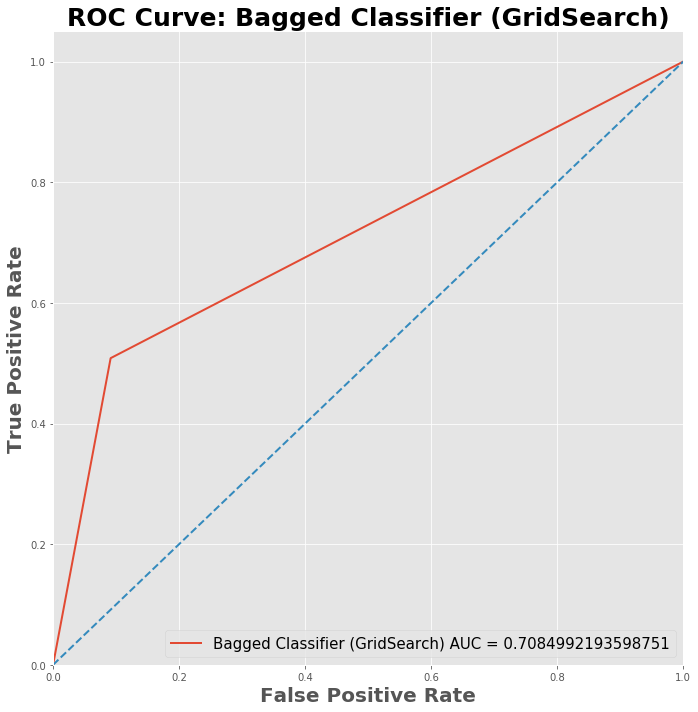

In [96]:
viz_roc(fpr, tpr, roc_auc, 'Bagged Classifier (GridSearch)')

In [107]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1164,117,1281
1,236,244,480
All,1400,361,1761


In [112]:
report1 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report1

,precision,recall,f1-score,support
0,0.831429,0.908665,0.868333,1281.000000
1,0.675900,0.508333,0.580262,480.000000
accuracy,0.799546,0.799546,0.799546,0.799546
macro avg,0.753664,0.708499,0.724297,1761.000000
weighted avg,0.789036,0.799546,0.789812,1761.000000


# **3) Random Forest - Vanilla**

# RF1

In [122]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
test_preds = rf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, test_preds)
roc_auc = auc(fpr, tpr)

In [123]:
print(f"Precision Score: {precision_score(y_test, test_preds)}")
print(f"Recall Score: {recall_score(y_test, test_preds)}")
print(f"Accuracy Score: {accuracy_score(y_test, test_preds)}")
print(f"F1 Score: {f1_score(y_test, test_preds)}")

Precision Score: 0.6374269005847953
Recall Score: 0.45416666666666666
Accuracy Score: 0.7808063600227144
F1 Score: 0.5304136253041362


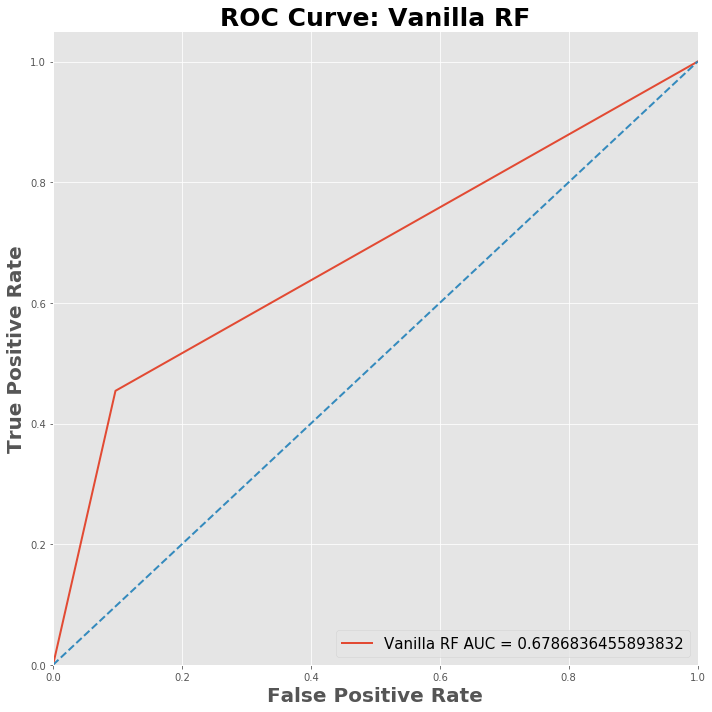

In [124]:
viz_roc(fpr, tpr, roc_auc, 'Vanilla RF')

In [125]:
pd.crosstab(y_test, test_preds, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,1157,124,1281
1,262,218,480
All,1419,342,1761


In [126]:
report2 = pd.DataFrame(classification_report(y_test, test_preds, output_dict = True)).transpose()
report2

,precision,recall,f1-score,support
0,0.815363,0.903201,0.857037,1281.000000
1,0.637427,0.454167,0.530414,480.000000
accuracy,0.780806,0.780806,0.780806,0.780806
macro avg,0.726395,0.678684,0.693725,1761.000000
weighted avg,0.766862,0.780806,0.768009,1761.000000
